<a href="https://colab.research.google.com/github/DLesmes/Dlesmes.github.io/blob/master/PruebaTecnicaAntivirus_Rta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba técnica: Análisis de mercado mobiliario


**Desarrollado por Diego Lesmes**

# 1. Prensado como un Data Science

¿Qué datos crees que te ayudarían a trabajar en el problema? ¿Por qué?

#Respuesta

Dentro de los diferentes atributos o características que podrían ser útiles para determinar el valor de una propiedad, se pueden tener en cuenta características como:

*   Tipo de propiedad: Residencial, comercial, apartamento entre otros
*   Área: Tamaño del predio que ocupa la propiedad
*   Área cubierta: Área Total sin tener en cuenta área al expuesta al aire libre
*   Ubicación: datos de latitud y longitud, para deerminar la ubicación del predio, de aca podemos obtener otros datos como:
  *   Departamento
  *   Ciudad
  *   Barrio
*   Diseño arquitectónico: tipo Arquitectonico de la propiedad
*   Año de construcción: Esta fecha nos podra indicar la antiguedad de la propiedad
*   '# de balcones: La cantidad de balcones con los que cuenta la propiedad
*   '# de habitaciones: La cantidad de cuartos con la que cuenta la propiedad
*   '# de baños: La cantidad de baños con la que cuenta la propiedad
*   Precio Comercial: El precio al cual esta valuada la propiedad
*   Precio catastral: El precio usado para causar impuestos
*   Precio de venta: El precio de venta de la propiedad
*   Fecha de la venta: Si la propiedad fue vendida anteriormente de esta manera se podría aplicarle el efecto de la infliación a los precios para hacerlos comparables
*   Paqueadero: Si la propiedad cuenta con parqueadero
*   Garaje: Si cuenta con un salón de garaje   
*   Unidades residenciales: Si la propiedad cuenta con varios apartamentos
*   Piso: si se trata de una unidad residencial en que piso se encuentra

En general esta información podría ser muy util para poder realizar un modelo predictivo que determine el valor de la propiedad, debido a que estas características inciden principalmente a la hora de realizar la venta de las propiedades, sin embargo el modelo esta en función del procedimiento que se realice en la información disponible y el análisis estadístico pertinente.


# 2. Análisis Exploratorio de Datos

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving DS_Proyecto_01_Datos_Properati.csv to DS_Proyecto_01_Datos_Properati.csv


In [67]:
import io
import pandas as pd
import seaborn as sns
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv(io.BytesIO(data_to_load['DS_Proyecto_01_Datos_Properati.csv']))
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
len(list(df.columns))

19

In [32]:
df.shape

(146660, 19)

In [13]:
df.columns

[Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
        'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
        'price', 'currency', 'title', 'description', 'property_type',
        'operation_type'],
       dtype='object')]

In [215]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64']
features_o = features[features['type'] == 'object']
features

,type
start_date,object
end_date,object
created_on,object
lat,float64
lon,float64
l1,object
l2,object
l3,object
rooms,float64
bedrooms,float64


In [23]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [169]:
df.describe(include='object')

,start_date,end_date,created_on,l1,l2,l3,currency,title,description,property_type,operation_type
count,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660
unique,366,412,366,1,4,89,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,Argentina,Capital Federal,Palermo,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,146660,92539,13073,146660,5064,235,107326,146660


In [165]:
df.describe(include='float64')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


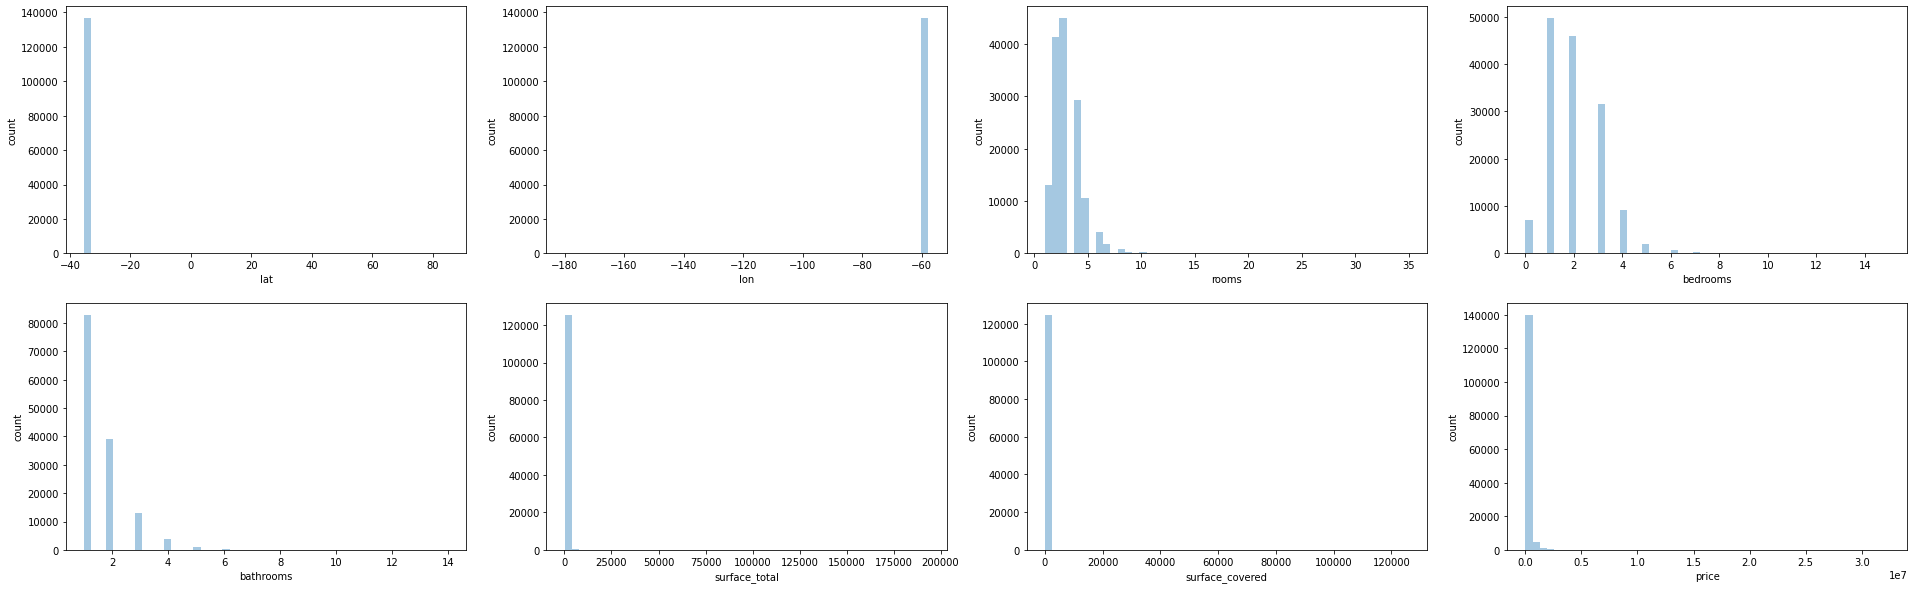

In [205]:
var_hist = features_f.index
plt.figure(figsize=(33,10))
for i,var in enumerate(var_hist):
    plt.subplot(2,len(features_f)/2,i+1)
    sns.distplot(df[var],kde=False)
    plt.xlabel(var)
    plt.ylabel("count")

In [262]:
clean = np.where(
    (df["lat"] < -21) & # norte
    (df["lat"] > -56) & # sur
    (df["lon"] > -58) & # este
    (df["lon"] < -26)  & # oeste
    (df["price"] > 1)  &
    (df["surface_total"] > 0)  &
    (df["surface_covered"] > 0) &
    #(pd.to_numeric(df["end_date"]) < pd.to_numeric(pd.Timestamp.now())) &
    (df["bathrooms"] > 0)
    )
df_cleaned = df.iloc[clean].copy()
df_cleaned['log(Price)'] = np.log(df_cleaned['price'])
df_cleaned['log(Price/S_total)'] = np.log(df_cleaned['price']/df_cleaned["surface_total"])
df_cleaned['log(Price/S_covered)'] = np.log(df_cleaned['price']/df_cleaned["surface_covered"])
df_cleaned['log(S_total)'] = np.log(df_cleaned["surface_total"])
df_cleaned['log(S_covered)'] = np.log(df_cleaned["surface_covered"])
df_cleaned['start_date_P'] = pd.to_datetime(df_cleaned["start_date"]).dt.to_period("M")
#df_cleaned['end_date_P'] = pd.to_datetime(pd.Timestamp.date(pd.to_datetime(df_cleaned["end_date"]))).dt.to_period("M")
df_cleaned['created_on_P'] = pd.to_datetime(df_cleaned["created_on"]).dt.to_period("M")

In [268]:
features = pd.DataFrame(df_cleaned.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64']
features_o = features[features['type'] == 'object']
features_f.shape

(13, 1)

In [264]:
df_cleaned.describe(include='float64')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,log(Price),log(Price/S_total),log(Price/S_covered),log(S_total),log(S_covered)
count,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2.510000e+03,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000
mean,-34.921683,-57.956296,3.418327,1.968127,1.321116,251.514741,131.117928,1.240011e+05,11.575285,7.007790,7.291436,4.567494,4.283849
std,0.017355,0.022080,1.713747,1.038411,0.708987,1963.447401,1277.523675,8.585590e+04,0.525379,0.724924,0.440885,0.876665,0.623634
min,-35.034227,-57.999956,1.000000,0.000000,1.000000,12.000000,2.000000,1.200000e+04,9.392662,0.662842,0.321584,2.484907,0.693147
25%,-34.930293,-57.969623,2.000000,1.000000,1.000000,51.000000,47.000000,7.500000e+04,11.225243,6.793669,7.108090,3.931826,3.850148
50%,-34.920201,-57.958039,3.000000,2.000000,1.000000,76.000000,65.000000,9.800000e+04,11.492723,7.211454,7.358783,4.330733,4.174387
75%,-34.911919,-57.945007,4.000000,2.000000,1.000000,153.750000,100.000000,1.420000e+05,11.863582,7.464907,7.541405,5.035324,4.605170
max,-34.876416,-57.805832,30.000000,13.000000,14.000000,67000.000000,58000.000000,1.900000e+06,14.457364,9.123329,10.341742,11.112448,10.968198


In [265]:
df_cleaned.describe(include='period[M]')

,start_date_P,created_on_P
count,2510,2510
unique,13,13
top,2019-03,2019-03
freq,261,261


In [232]:
df_cleaned.shape

(2510, 24)

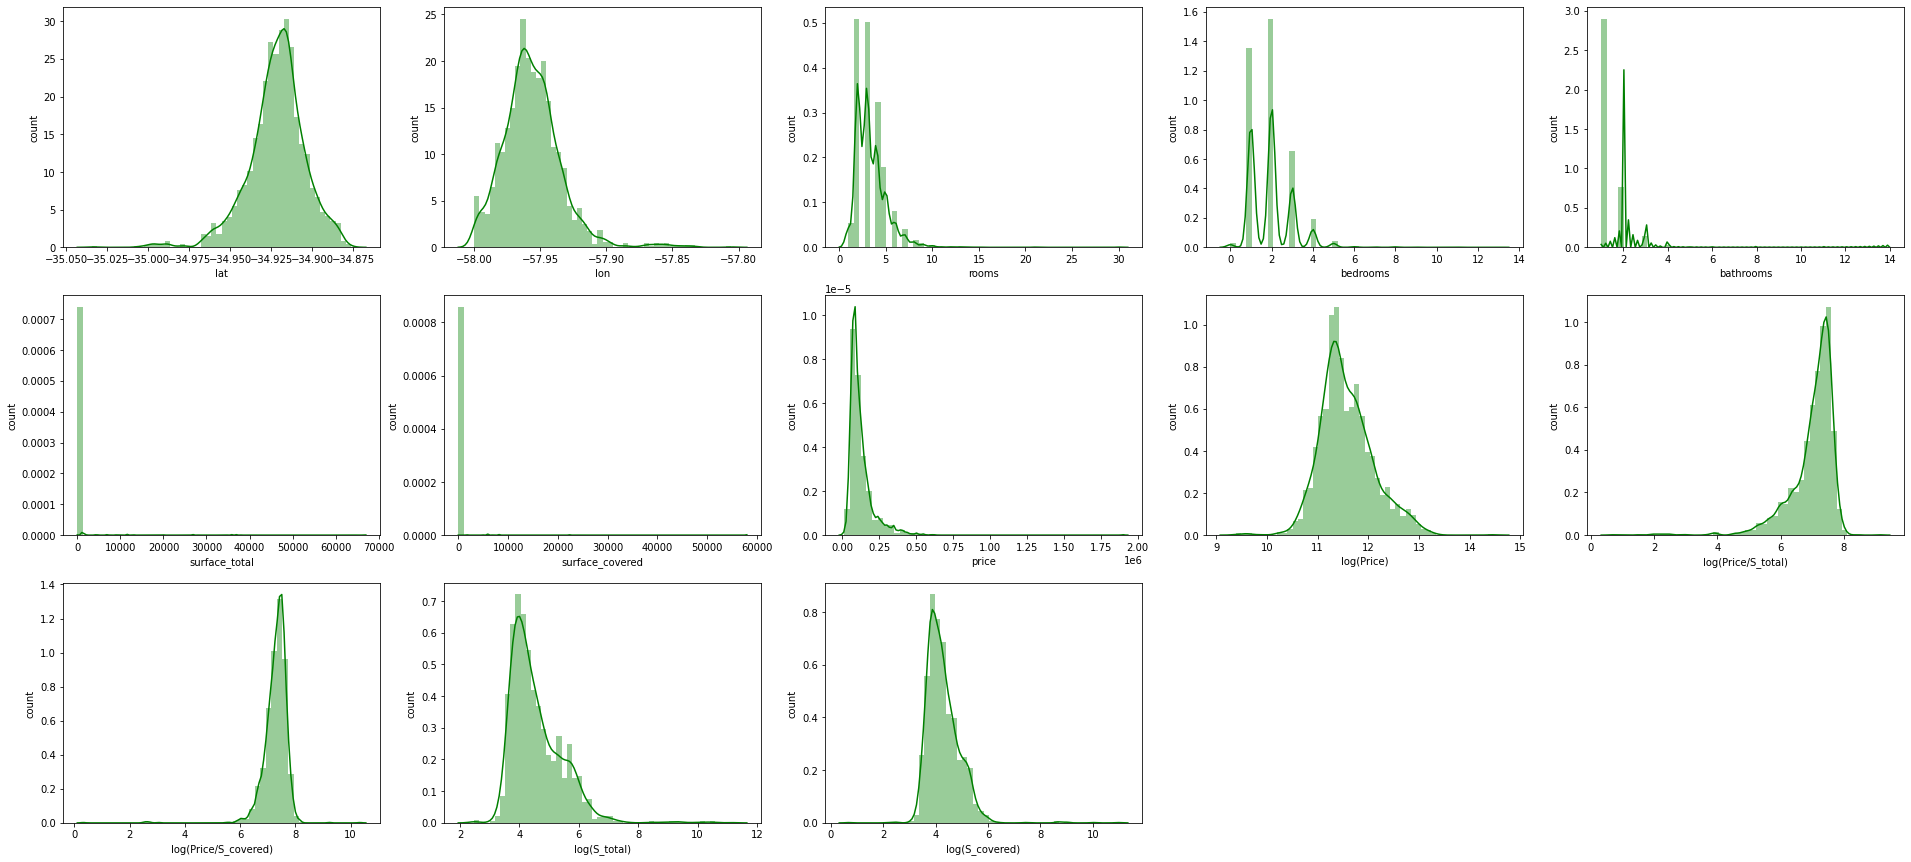

In [270]:
var_hist = features_f.index
plt.figure(figsize=(33,15))
for i,var in enumerate(var_hist):
    plt.subplot(3,5,i+1)
    sns.distplot(df_cleaned[var],kde=True, color='g')
    plt.xlabel(var)
    plt.ylabel("count")

In [118]:
df_cleaned.isnull().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

In [112]:
df_cleaned['currency'].unique()

array(['USD'], dtype=object)

In [113]:
df_cleaned['property_type'].unique()

array(['PH', 'Departamento', 'Casa', 'Cochera', 'Casa de campo',
       'Oficina', 'Otro', 'Lote'], dtype=object)

In [57]:
df_cleaned['operation_type'].unique()

array(['Venta'], dtype=object)

In [58]:
df_cleaned['l1'].unique()

array(['Argentina'], dtype=object)

In [74]:
df_cleaned['l2'].unique()

array(['Bs.As. G.B.A. Zona Sur'], dtype=object)

In [82]:
df_cleaned['l3'].unique()

array(['La Plata', 'Esteban Echeverría'], dtype=object)

In [86]:
len(df_cleaned[df_cleaned['l3']=='Esteban Echeverría'])

1

In [276]:
varstolook = ['start_date_P','created_on_P', 'property_type',
        'rooms', 'bedrooms', 'bathrooms', 'lat', 'lon','log(S_total)','log(S_covered)',
        'log(Price/S_total)','log(Price/S_covered)','price','log(Price)']
len(varstolook)

14

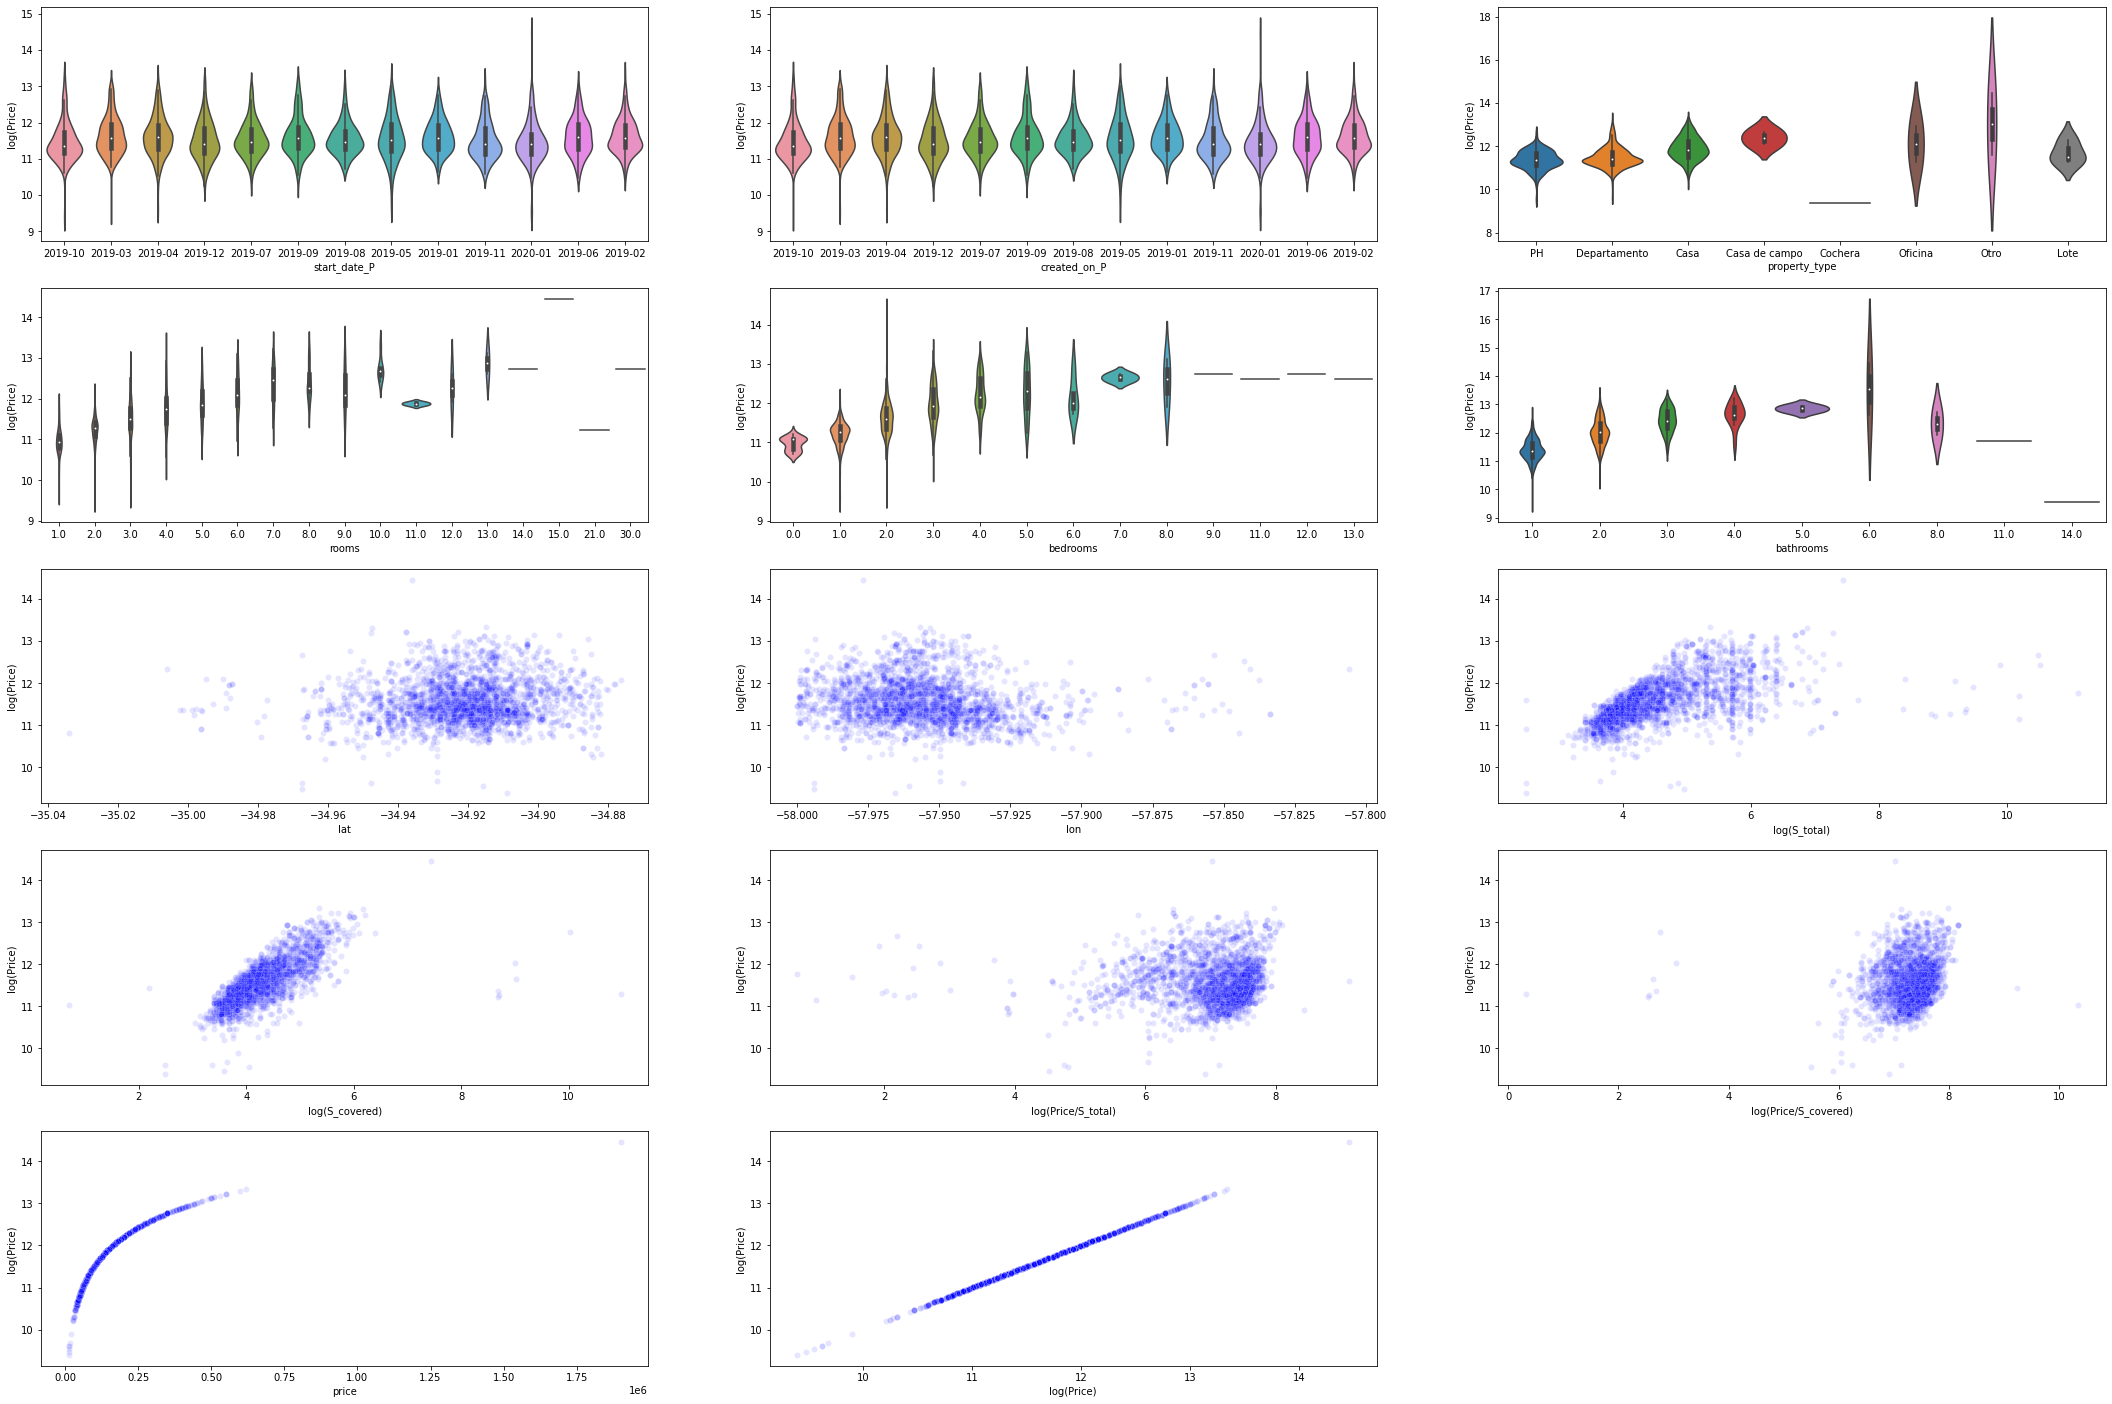

In [277]:
plt.figure(figsize=(37,25))
for i,var in enumerate(varstolook):
    plt.subplot(5,3,i+1)
    if var in ['start_date_P','created_on_P','bathrooms','rooms','bedrooms','property_type']:
        sns.violinplot(x=var, y='log(Price)', data=df_cleaned)
    else:
        sns.scatterplot(x=var,y='log(Price)',data=df_cleaned, alpha=0.10,color='b')